In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, classification_report)
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv('../0_data/insurance.csv', keep_default_na=False, na_values=[''])
df.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
X_cols = [x for x in range(27)]
X_cols.remove(7)

y = df.iloc[:, 7].values
X = df.iloc[:, X_cols].values

In [6]:
labelenconder = LabelEncoder()

In [7]:
for i in range(X.shape[1]):
    if X[:, i].dtype == 'object':
        X[:, i] = labelenconder.fit_transform(X[:, i])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, random_state=1)

In [9]:
model = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=20, max_leaf_nodes=12)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=12, n_estimators=500,
                       random_state=1)

[Text(0.4642857142857143, 0.9166666666666666, 'SeniorTrain <= 2.5\ngini = 0.452\nsamples = 8900\nvalue = [1171, 1107, 10109, 1613]\nclass = y[2]'),
 Text(0.2857142857142857, 0.75, 'Mileage <= 0.5\ngini = 0.516\nsamples = 1538\nvalue = [115, 848, 18, 1497]\nclass = y[3]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'MakeModel <= 1.5\ngini = 0.5\nsamples = 1330\nvalue = [94, 700, 11, 1349]\nclass = y[3]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.636\nsamples = 74\nvalue = [13.0, 62.0, 11.0, 37.0]\nclass = y[1]'),
 Text(0.21428571428571427, 0.4166666666666667, 'AntiTheft <= 1.5\ngini = 0.482\nsamples = 1256\nvalue = [81, 638, 0, 1312]\nclass = y[3]'),
 Text(0.14285714285714285, 0.25, 'PropCost <= 1.5\ngini = 0.387\nsamples = 740\nvalue = [15, 289, 0, 886]\nclass = y[3]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.338\nsamples = 665\nvalue = [2, 229, 0, 845]\nclass = y[3]'),
 Text(0.21428571428571427, 0.083333

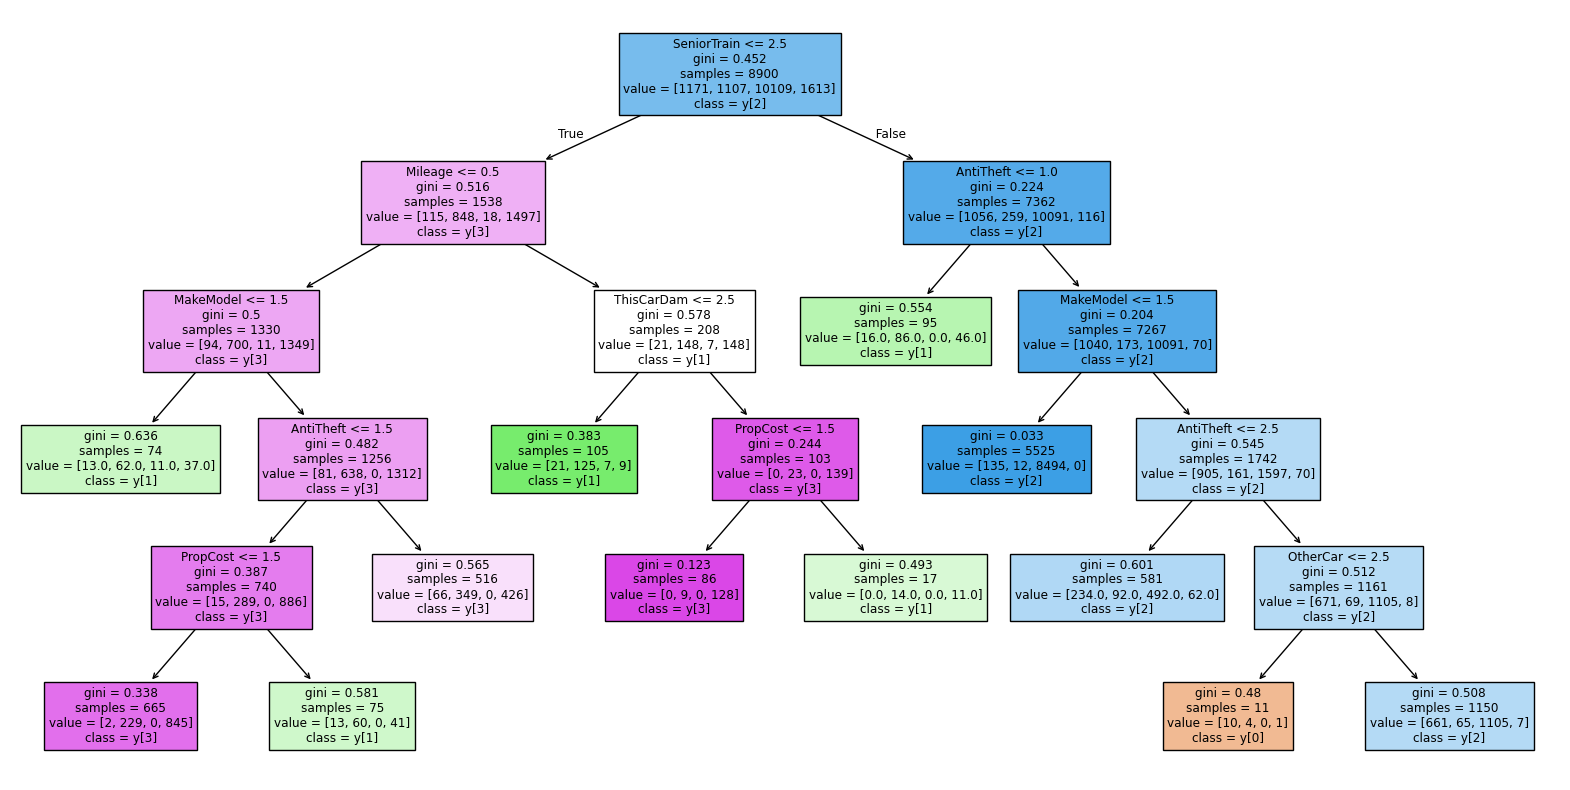

In [10]:
tree_index = 0
tree_to_view = model.estimators_[tree_index]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_view, filled=True, feature_names=df.columns[:-1], class_names=True)

In [11]:
predictions = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')

Accuracy: 0.9288333333333333, Precision: 0.9249231961050131, Recall: 0.9288333333333333, F1: 0.9244475196632328


In [13]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

        Mild       0.85      0.59      0.70       542
    Moderate       0.76      0.71      0.73       505
        None       0.96      1.00      0.98      4228
      Severe       0.89      0.92      0.91       725

    accuracy                           0.93      6000
   macro avg       0.86      0.81      0.83      6000
weighted avg       0.92      0.93      0.92      6000

